In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from helpers.plot_helpers import *
from helpers.computational_tools import gaussian_remesh
%load_ext autoreload
%autoreload 3
import warnings
warnings.filterwarnings("ignore")

In [2]:
from helpers.collection_of_experiments import *

In [3]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/Yellowstone/experiments/zelong-model-FGR', additional_subfolder='output', prefix='boundary10')

In [4]:
ds += CollectionOfExperiments.init_folder('/vast/pp2681/Yellowstone/generalization-FGR-sqrt12', additional_subfolder='output', prefix='')

In [5]:
ds += CollectionOfExperiments.init_folder('/vast/pp2681/Yellowstone/bare', additional_subfolder='output', prefix='')

In [6]:
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2023/generalization', additional_subfolder='output')

In [7]:
for RR in ['R2', 'R4', 'R6', 'R16', 'R32']:
    ds.remesh('R64', RR, exp=f'R64_{RR}')

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6
Experiment R64 coarsegrained to R16 is created. Its identificator=R64_R16
Experiment R64 coarsegrained to R32 is created. Its identificator=R64_R32


# Perry question: is Cs tuned to reproduce energy in low wavenumbers?

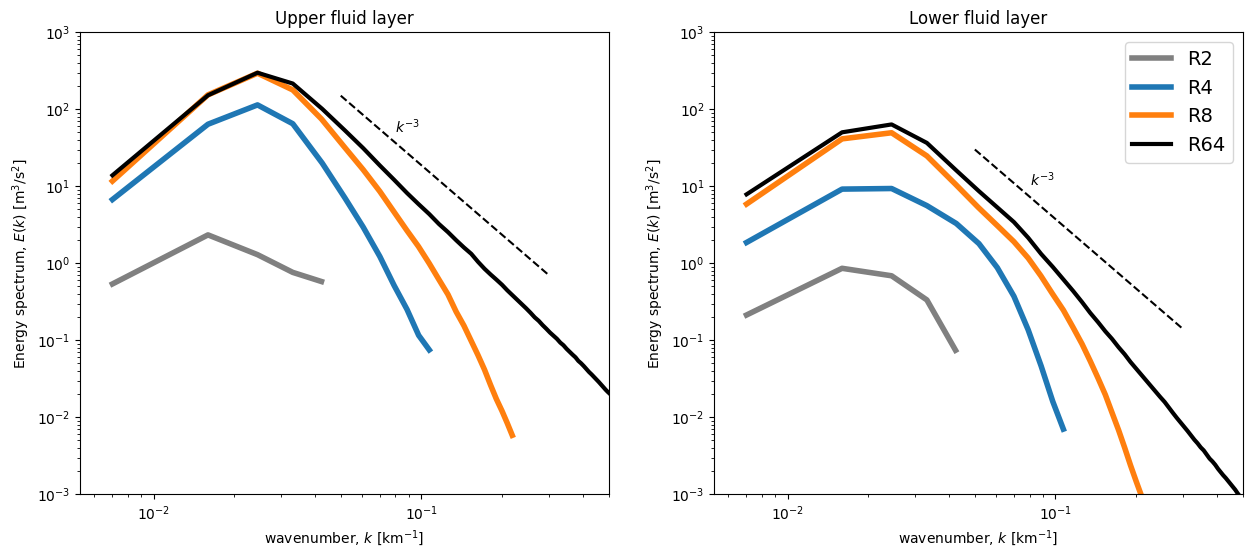

In [4]:
ds.plot_KE_spectrum(['R2', 'R4', 'R8', 'R64'])

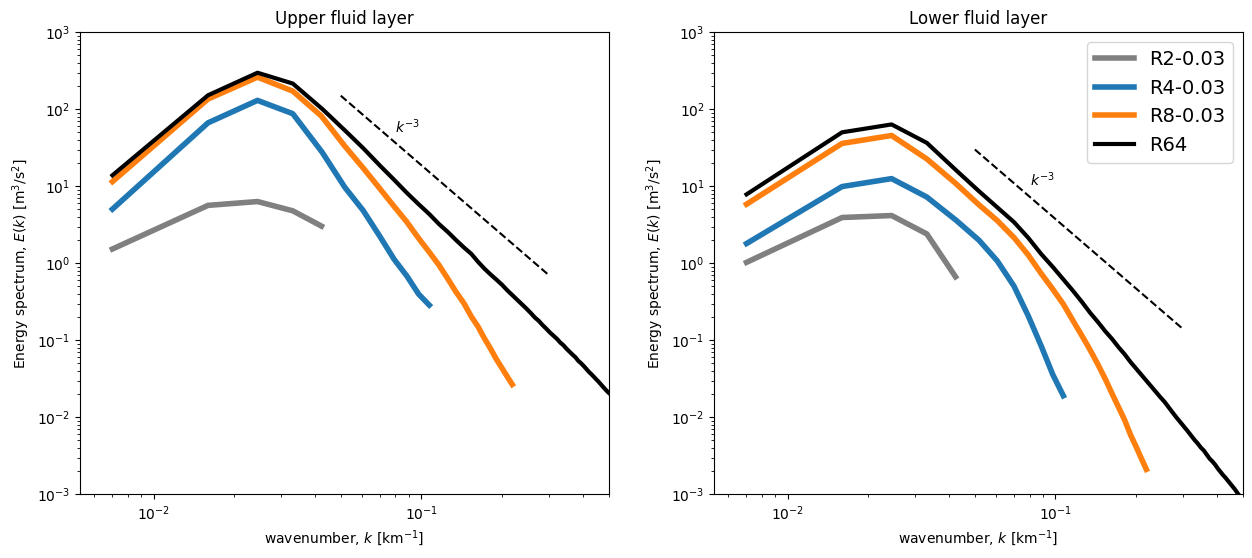

In [9]:
ds.plot_KE_spectrum(['R2-0.03', 'R4-0.03', 'R8-0.03', 'R64'])

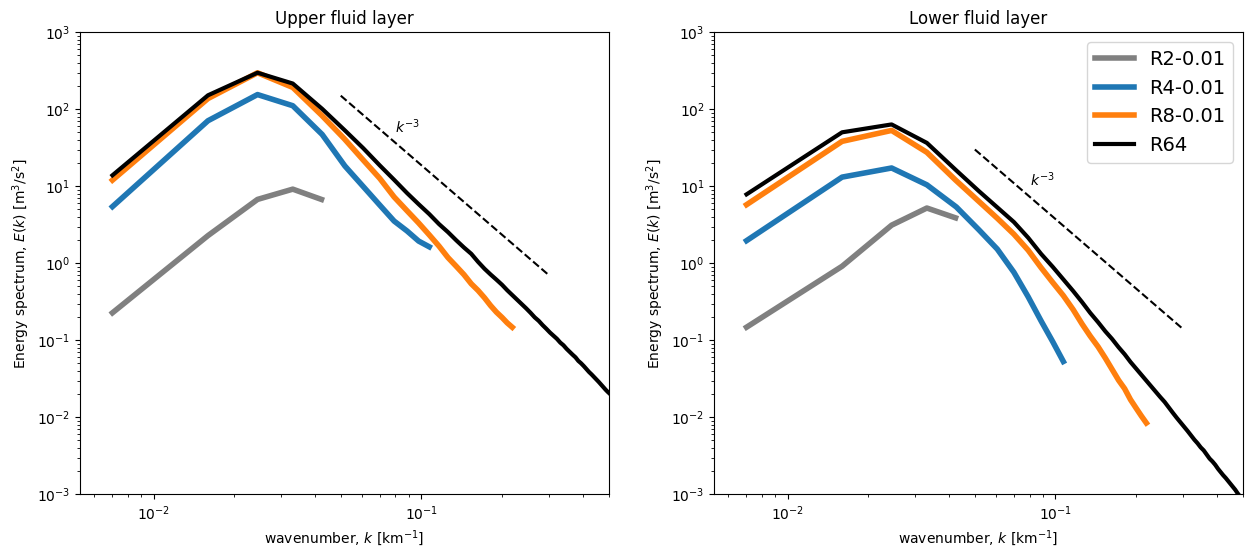

In [10]:
ds.plot_KE_spectrum(['R2-0.01', 'R4-0.01', 'R8-0.01', 'R64'])

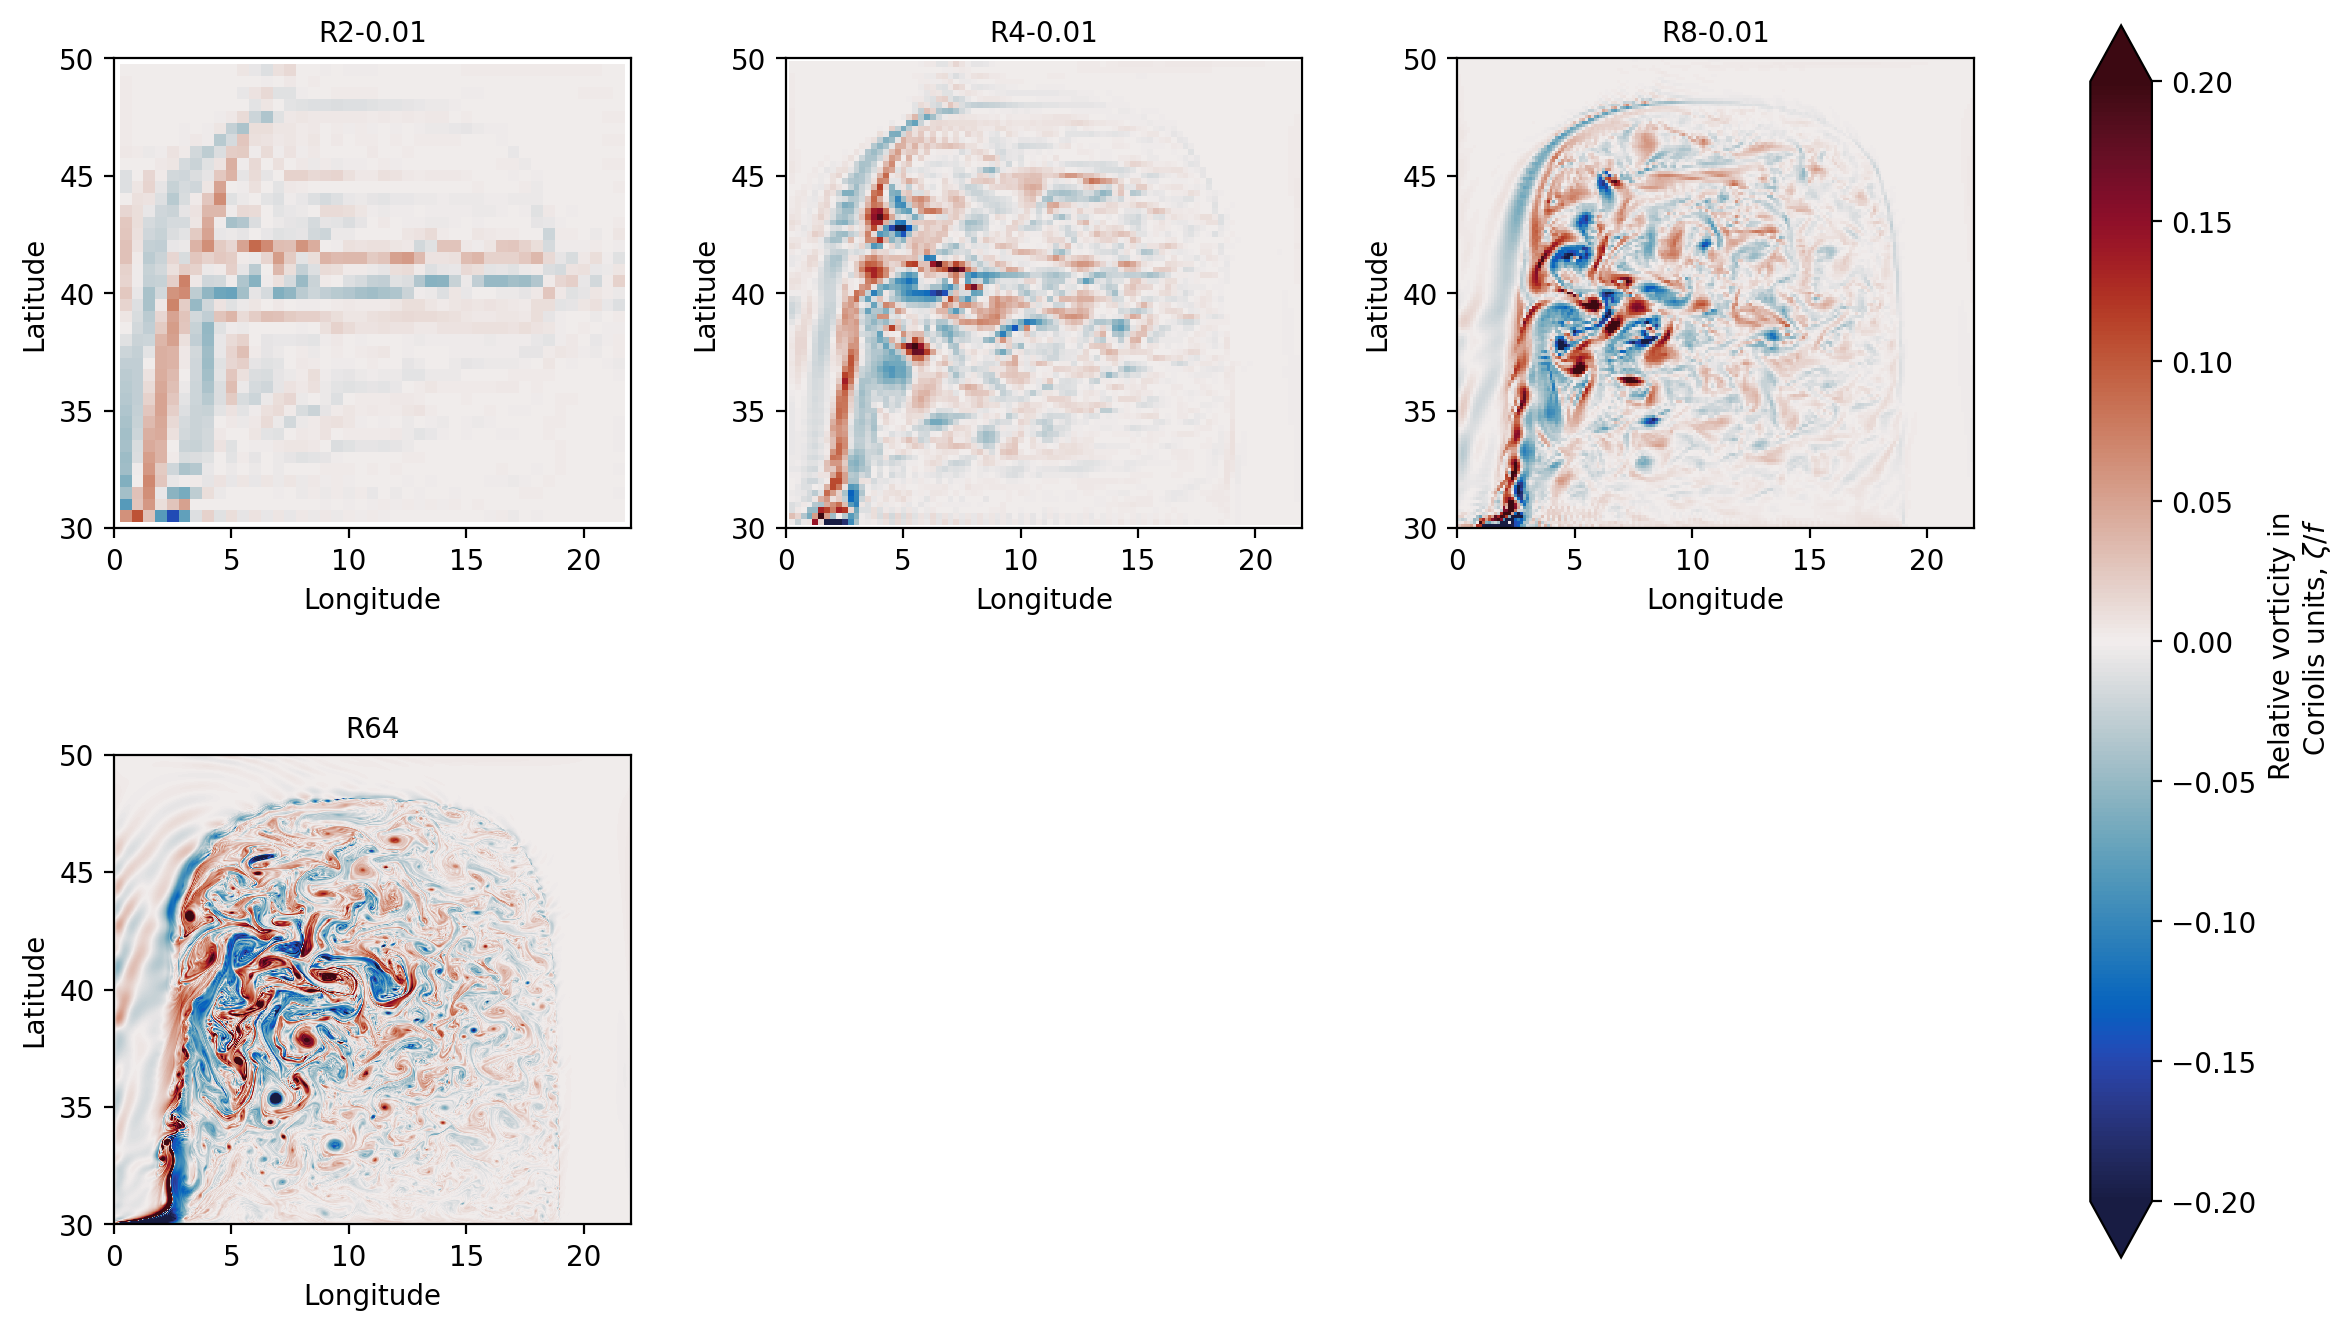

In [11]:
ds.plot_RV(['R2-0.01', 'R4-0.01', 'R8-0.01', 'R64'])

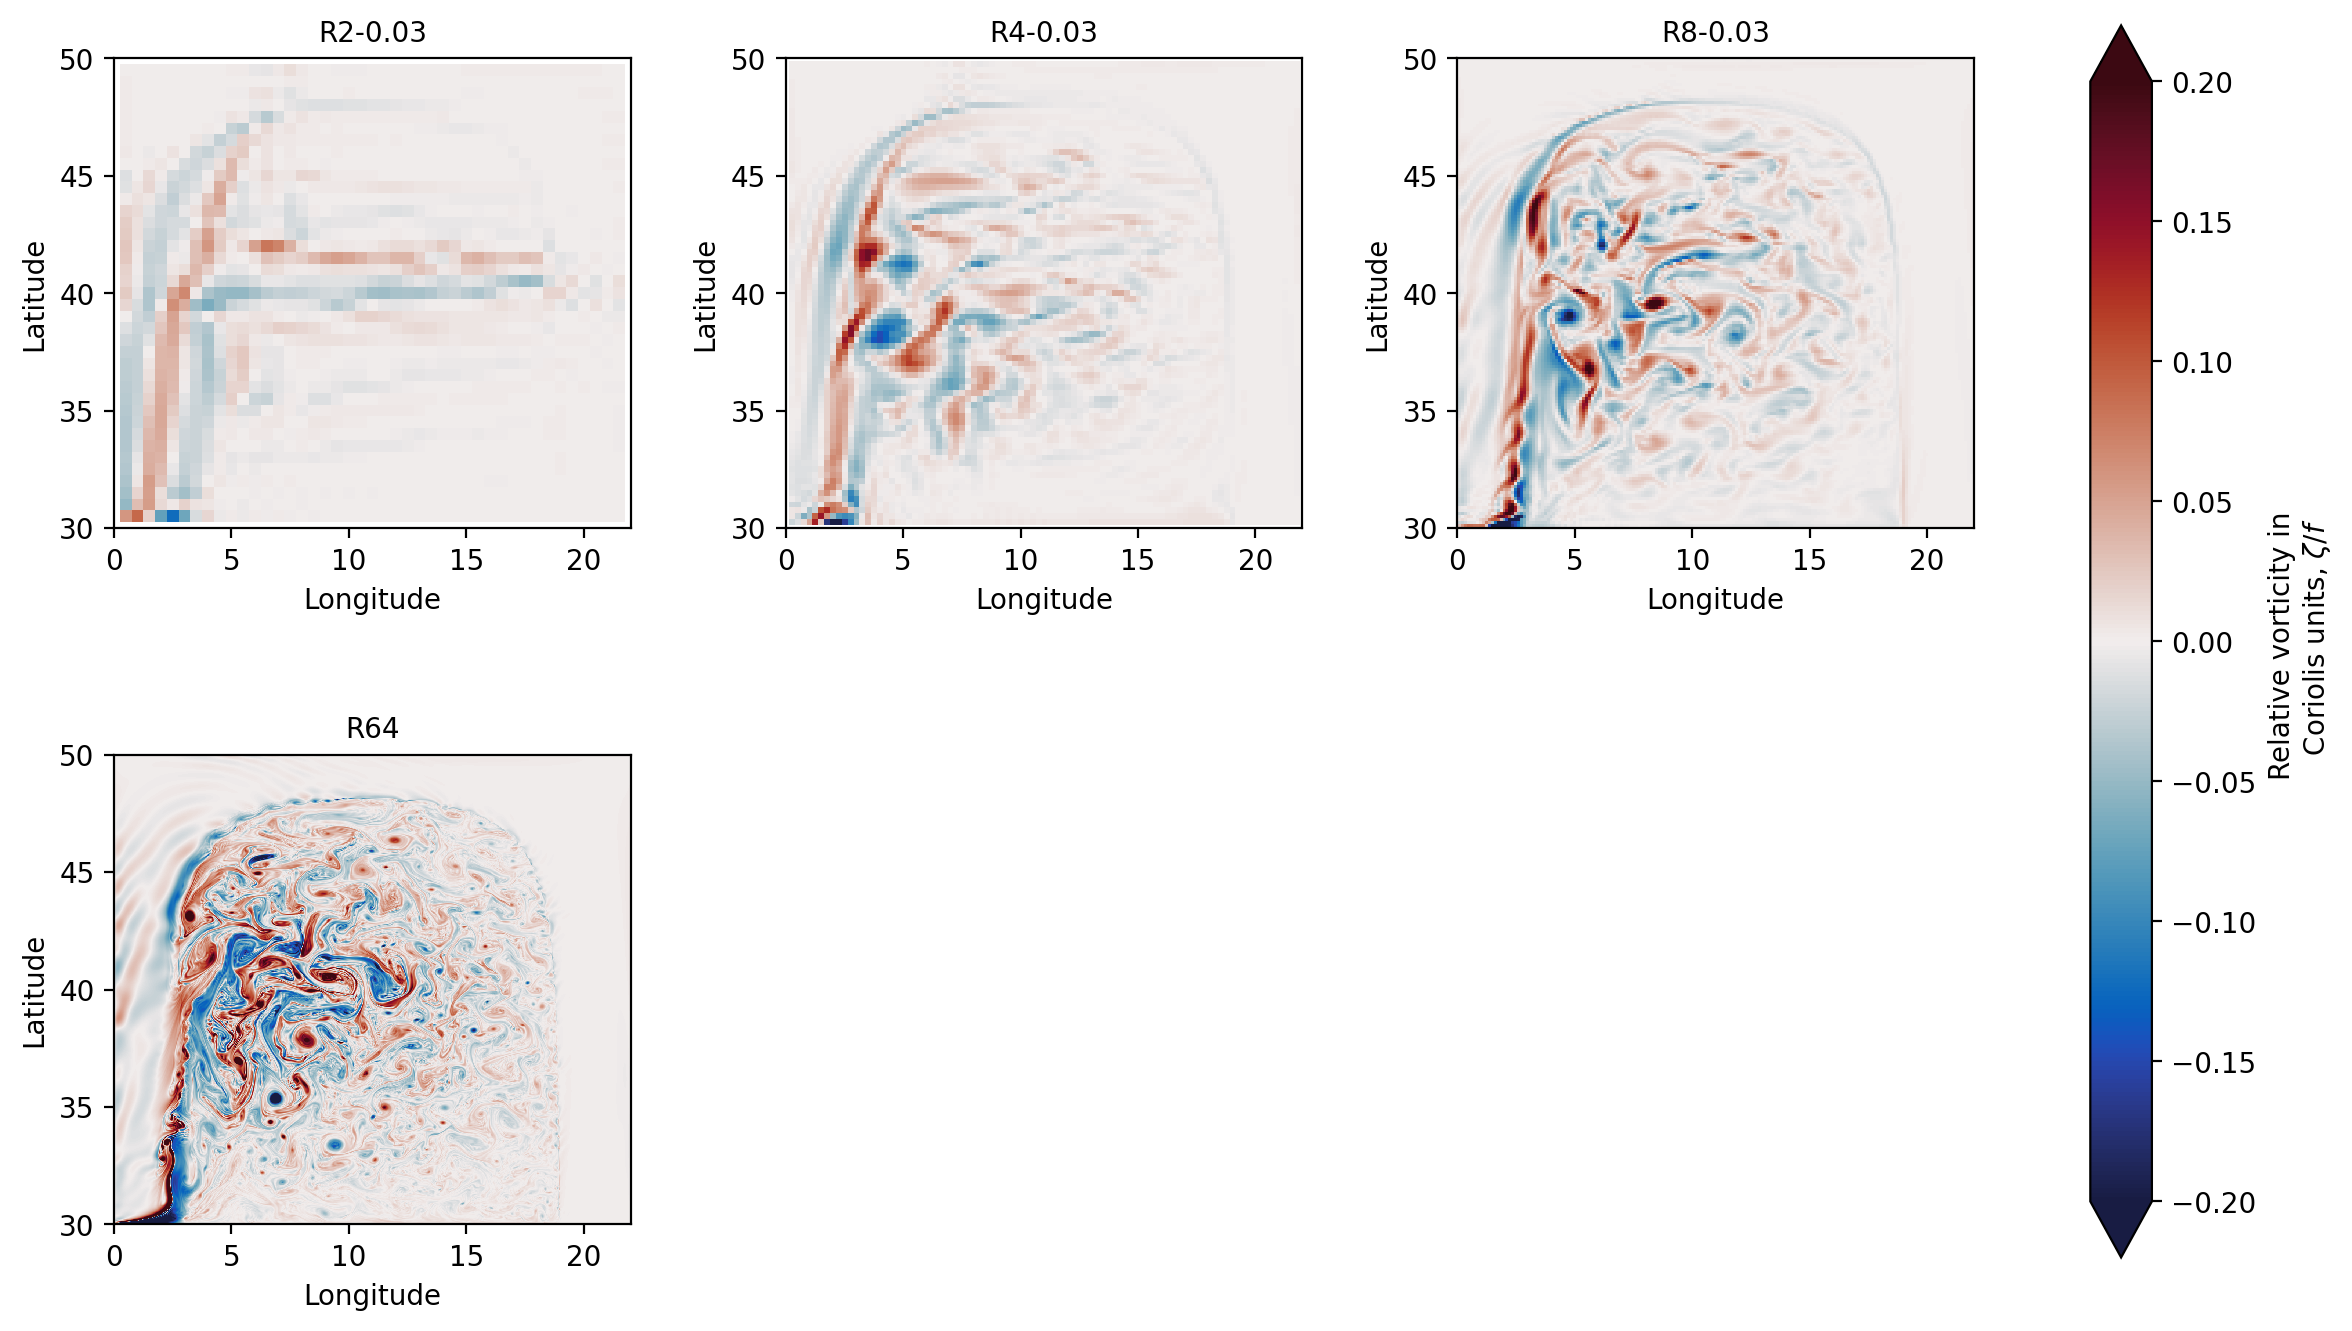

In [12]:
ds.plot_RV(['R2-0.03', 'R4-0.03', 'R8-0.03', 'R64'])

# Is clipping used?

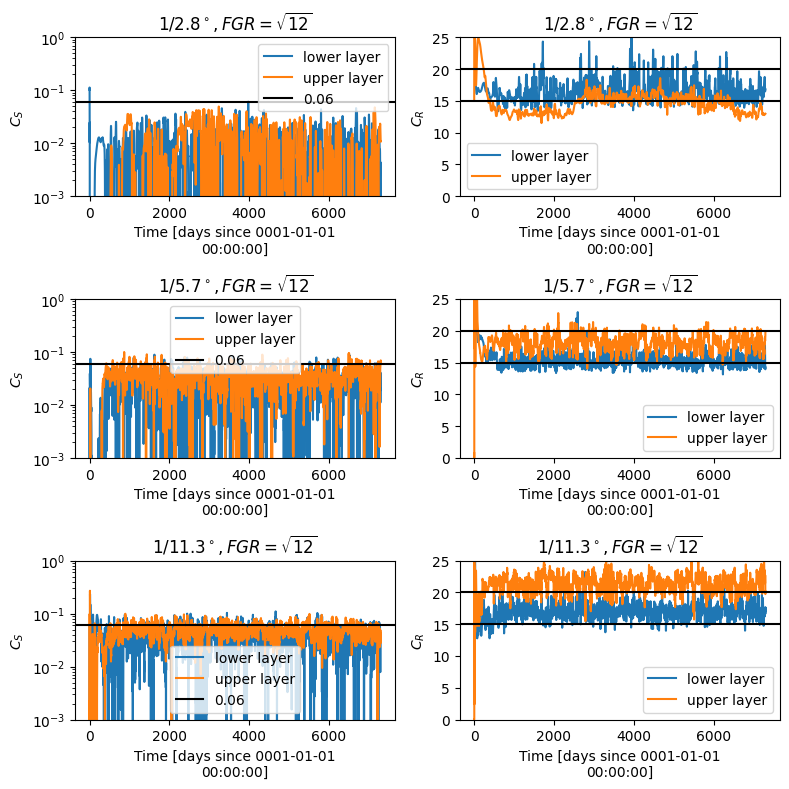

In [42]:
plt.figure(figsize=(8,8))
plt.subplot(3,2,1)
ds['boundary10-R2-FGR-sqrt12'].series_diag.smag_const.isel(zl=1).plot(label='lower layer')
ds['boundary10-R2-FGR-sqrt12'].series_diag.smag_const.isel(zl=0).plot(label='upper layer')
plt.yscale('log')
plt.ylim([1e-3, 1])
plt.axhline(y=0.06, color='k', label='0.06')
plt.title('$1/2.8^\circ, FGR=\sqrt{12}$')
plt.legend()
plt.ylabel('$C_S$')

plt.subplot(3,2,3)
ds['boundary10-R4-FGR-sqrt12'].series_diag.smag_const.isel(zl=1).plot(label='lower layer')
ds['boundary10-R4-FGR-sqrt12'].series_diag.smag_const.isel(zl=0).plot(label='upper layer')
plt.yscale('log')
plt.ylim([1e-3, 1])
plt.axhline(y=0.06, color='k',label='0.06')
plt.title('$1/5.7^\circ, FGR=\sqrt{12}$')
plt.legend()
plt.ylabel('$C_S$')

plt.subplot(3,2,5)
ds['boundary10-R8-FGR-sqrt12'].series_diag.smag_const.isel(zl=1).plot(label='lower layer')
ds['boundary10-R8-FGR-sqrt12'].series_diag.smag_const.isel(zl=0).plot(label='upper layer')
plt.yscale('log')
plt.ylim([1e-3, 1])
plt.axhline(y=0.06, color='k',label='0.06')
plt.legend()
plt.ylabel('$C_S$')


plt.title('$1/11.3^\circ, FGR=\sqrt{12}$')

plt.subplot(3,2,2)
ds['boundary10-R2-FGR-sqrt12'].series_diag.CR_const.isel(zl=1).plot(label='lower layer')
ds['boundary10-R2-FGR-sqrt12'].series_diag.CR_const.isel(zl=0).plot(label='upper layer')
plt.yscale('linear')
plt.legend()
plt.ylim([0,25])
plt.axhline(y=15, color='k')
plt.axhline(y=20, color='k')
plt.title('$1/2.8^\circ, FGR=\sqrt{12}$')
plt.ylabel('$C_R$')

plt.subplot(3,2,4)
ds['boundary10-R4-FGR-sqrt12'].series_diag.CR_const.isel(zl=1).plot(label='lower layer')
ds['boundary10-R4-FGR-sqrt12'].series_diag.CR_const.isel(zl=0).plot(label='upper layer')
plt.yscale('linear')
plt.legend()
plt.ylim([0,25])
plt.axhline(y=15, color='k')
plt.axhline(y=20, color='k')
plt.title('$1/5.7^\circ, FGR=\sqrt{12}$')
plt.ylabel('$C_R$')

plt.subplot(3,2,6)
ds['boundary10-R8-FGR-sqrt12'].series_diag.CR_const.isel(zl=1).plot(label='lower layer')
ds['boundary10-R8-FGR-sqrt12'].series_diag.CR_const.isel(zl=0).plot(label='upper layer')
plt.yscale('linear')
plt.ylim([0,25])
plt.axhline(y=15, color='k')
plt.axhline(y=20, color='k')
plt.legend()
plt.ylabel('$C_R$')

plt.title('$1/11.3^\circ, FGR=\sqrt{12}$')



plt.tight_layout()

(20, 22) (20, 22)


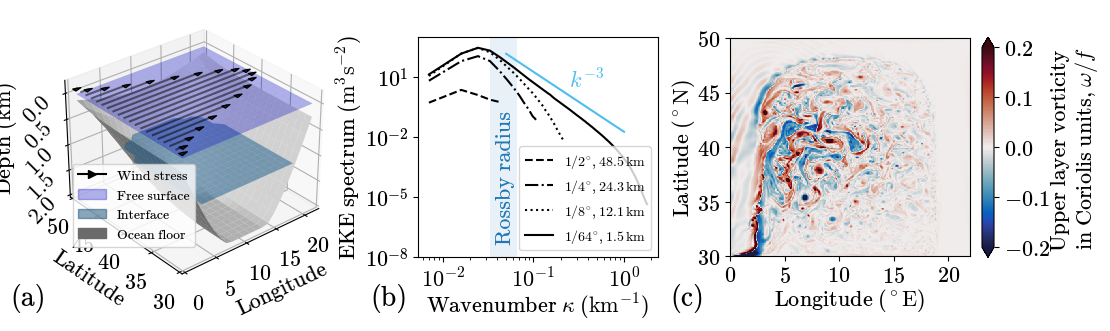

In [8]:
default_rcParams({'font.size': 16,'axes.formatter.limits': (-2,4), 'figure.subplot.wspace': 0.5, 'figure.subplot.hspace': 0.4})
fig = plt.figure(figsize=(12,4))
lightblue = [0.3010, 0.7450, 0.9330]
exps =['R2', 'R4', 'R8', 'R64']
labels=['$1/2^{\circ}$, $48.5\,\mathrm{km}$', '$1/4^{\circ}$, $24.3\,\mathrm{km}$', '$1/8^{\circ}$, $12.1\,\mathrm{km}$', '$1/64^{\circ}$, $1.5\,\mathrm{km}$']
colors = ['k', 'k', 'k', 'k']
lss = ['--', '-.', ':', '-']
def plot_spectrum(zl=0):
    for exp,label,color,ls in zip(exps,labels,colors,lss):
        ds[exp].EKE_spectrum.isel(zl=zl).plot(label=label,color=color,ls=ls)
    plt.xlabel(r'Wavenumber $\kappa$ ($\mathrm{km}^{-1}$)')
    plt.ylabel('EKE spectrum ($\mathrm{m}^3\mathrm{s}^{-2}$)')
    k = [5e-5, 1e-3]
    E = [1.5e+2, 0]
    plt.text(2.5e-4,0.3e+1,'$k^{-3}$',color=lightblue)
    E[1] = E[0] * (k[1]/k[0])**(-3)
    plt.loglog(k,E,ls='-', color=lightblue)
    plt.title('')
    plt.ylim([1e-8,1e+3])
    plt.xticks([1e-5,1e-4,1e-3],['$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
    
def plot_vorticity(exp):
    field = ds[exp].RV_f.isel(zl=0,Time=-1)
    if exp=='R64':
        field = field.coarsen(xq=2,yq=2,boundary='trim').mean().compute()
    im = field.plot.imshow(vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance, add_colorbar=False, interpolation='none')#, rasterized=True) #interpolation='none',
    plt.xticks([0,5,10,15,20])
    plt.yticks([30,35,40,45,50])
    plt.xlim([0,22])
    plt.ylim([30,50])
    plt.xlabel('Longitude ($^\circ\mathrm{E}$)')
    plt.ylabel('Latitude ($^\circ\mathrm{N}$)')
    plt.title('')
    plt.gca().set_aspect(1)
    return im

ax = fig.add_axes([0.1, 0.12, 0.4, 0.7], projection='3d')
ds.plot_domain(ax)

ax = fig.add_axes([0.49, 0.2, 0.2, 0.55]); plt.sca(ax)
plot_spectrum(zl=0)
# Baroclinic deformation radius
Rd1 = 30000
Rd2 = 15000
plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
plt.text(3.8e-5,1e-4,'Rossby radius', fontsize=16, color='tab:blue', rotation='vertical', verticalalignment='center')
#plt.title('Upper Layer', loc='right')
plt.title('')
#plt.legend(ncol=5, bbox_to_anchor=(2.6,-0.25), title='Biharmonic Smagorinsky models with $C_S=0.06$')
plt.legend(ncol=1, fontsize=10, loc='lower right')

ax = fig.add_axes([0.75, 0.2, 0.2, 0.55]); plt.sca(ax)
im = plot_vorticity('R64_R16')
#plt.ylabel('')
#plt.yticks([30,35,40,45,50], [None]*5)
#plt.title(labels[-1],loc='right')
plt.title('')

cax = fig.add_axes([0.96, 0.2, 0.01, 0.55])
plt.colorbar(im, cax=cax, extend='both', label='Upper layer vorticity \nin Coriolis units, $\omega/f$')


#set_letters(x=-0.05, y=1.05, fontsize=20, letters=['a', 'b', 'c', 'd', 'e', 'f'])
fig.text(0.15,0.08,'(a)', fontsize=20);
fig.text(0.45,0.08,'(b)', fontsize=20);
fig.text(0.70,0.08,'(c)', fontsize=20);

plt.savefig('figure-proceedings/DoubleGyre-update.pdf', pad_inches=0.3, dpi=200)

# A priori and a posteriori performance

In [9]:
for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    ds.remesh('R64', RR, operator=gaussian_remesh, FGR=np.sqrt(6), exp=f'R64_{RR}_FGR-sqrt6')

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2_FGR-sqrt6
Experiment R64 coarsegrained to R3 is created. Its identificator=R64_R3_FGR-sqrt6
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR-sqrt6
Experiment R64 coarsegrained to R5 is created. Its identificator=R64_R5_FGR-sqrt6
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6_FGR-sqrt6
Experiment R64 coarsegrained to R7 is created. Its identificator=R64_R7_FGR-sqrt6
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8_FGR-sqrt6


In [10]:
for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    for file in [f'/scratch/pp2681/Yellowstone/filtered-data/R64_{RR}_FGR-sqrt6-part1.nc', 
                 f'/scratch/pp2681/Yellowstone/filtered-data/R64_{RR}_FGR-sqrt6-part2.nc',
                 f'/scratch/pp2681/Yellowstone/filtered-data/R64_{RR}_FGR-sqrt6-part3.nc']:
            dataset = xr.open_dataset(file, decode_times=False)
            for key in dataset.keys():
                var = dataset[key]
                #var['Time'] = ds['R64'].u['Time']
                setattr(ds[f'R64_{RR}_FGR-sqrt6'], key, var)

In [83]:
SGS_transfer = {}
for RR in ['R2', 'R4', 'R8']:
    exp = ds[f'R64_{RR}_FGR-sqrt6']
    SGS_transfer[f'CA-{RR}'] = exp.transfer(exp.SGS_CAu, exp.SGS_CAv)
    DMMR = exp.dynamic_model_SSD(ssm=True, reynolds=True, clip=False, SGS_CAu = exp.SGS_CAu, SGS_CAv = exp.SGS_CAv)
    SGS_transfer[f'DMM-R-{RR}'] = exp.transfer(DMMR['dudt'], DMMR['dvdt'], truncate=True).compute()
    SGS_transfer[f'DMM-R-opt-{RR}'] = exp.transfer(DMMR['dudt_opt'], DMMR['dvdt_opt'], truncate=True).compute()
    print(RR)

R2
R4
R8


In [8]:
for RR in ['R2','R4','R8']:
    ds.remesh('R64', f'boundary10-{RR}-FGR-sqrt12', operator=gaussian_remesh, FGR=np.sqrt(12), exp=f'R64_{RR}_FGR-sqrt12-grid')

Experiment R64 coarsegrained to boundary10-R2-FGR-sqrt12 is created. Its identificator=R64_R2_FGR-sqrt12-grid
Experiment R64 coarsegrained to boundary10-R4-FGR-sqrt12 is created. Its identificator=R64_R4_FGR-sqrt12-grid
Experiment R64 coarsegrained to boundary10-R8-FGR-sqrt12 is created. Its identificator=R64_R8_FGR-sqrt12-grid


In [9]:
for RR in ['R2','R4','R8']:
    for file in [f'/scratch/pp2681/Yellowstone/filtered-data/R64_{RR}_FGR-sqrt12-grid-part1.nc', 
                 f'/scratch/pp2681/Yellowstone/filtered-data/R64_{RR}_FGR-sqrt12-grid-part2.nc',
                 f'/scratch/pp2681/Yellowstone/filtered-data/R64_{RR}_FGR-sqrt12-grid-part3.nc']:
            dataset = xr.open_dataset(file, decode_times=False)
            for key in dataset.keys():
                var = dataset[key]
                #var['Time'] = ds['R64'].u['Time']
                setattr(ds[f'R64_{RR}_FGR-sqrt12-grid'], key, var)

In [10]:
SGS_transfer = {}
for RR in ['R2', 'R4', 'R8']:
    exp = ds[f'R64_{RR}_FGR-sqrt12-grid']
    SGS_transfer[f'CA-{RR}-sqrt12-grid'] = exp.transfer(exp.SGS_CAu, exp.SGS_CAv, truncate=True).compute()
    DMMR = exp.dynamic_model_SSD(ssm=True, reynolds=True, clip=False, SGS_CAu = exp.SGS_CAu, SGS_CAv = exp.SGS_CAv, tf_iter=2)
    SGS_transfer[f'DMM-R-{RR}-sqrt12-grid'] = exp.transfer(DMMR['dudt'], DMMR['dvdt'], truncate=True).compute()
    SGS_transfer[f'DMM-R-opt-{RR}-sqrt12-grid'] = exp.transfer(DMMR['dudt_opt'], DMMR['dvdt_opt'], truncate=True).compute()

    # DMMR_new = exp.dynamic_model_SSD(ssm=True, reynolds=True, clip=False, two_parameter=True, tf_iter=2, true_sequential=True, SGS_CAu = exp.SGS_CAu, SGS_CAv = exp.SGS_CAv)
    # SGS_transfer[f'DMM-R-two-parameter-{RR}-sqrt12-grid'] = exp.transfer(DMMR_new['dudt'], DMMR_new['dvdt'], truncate=True).compute()
    # SGS_transfer[f'DMM-R-opt-seq-{RR}-sqrt12-grid'] = exp.transfer(DMMR_new['dudt_opt'], DMMR_new['dvdt_opt'], truncate=True).compute()
    print(RR)

R2
R4
R8


In [12]:
def compensated(sp):
    return sp * sp.freq_r

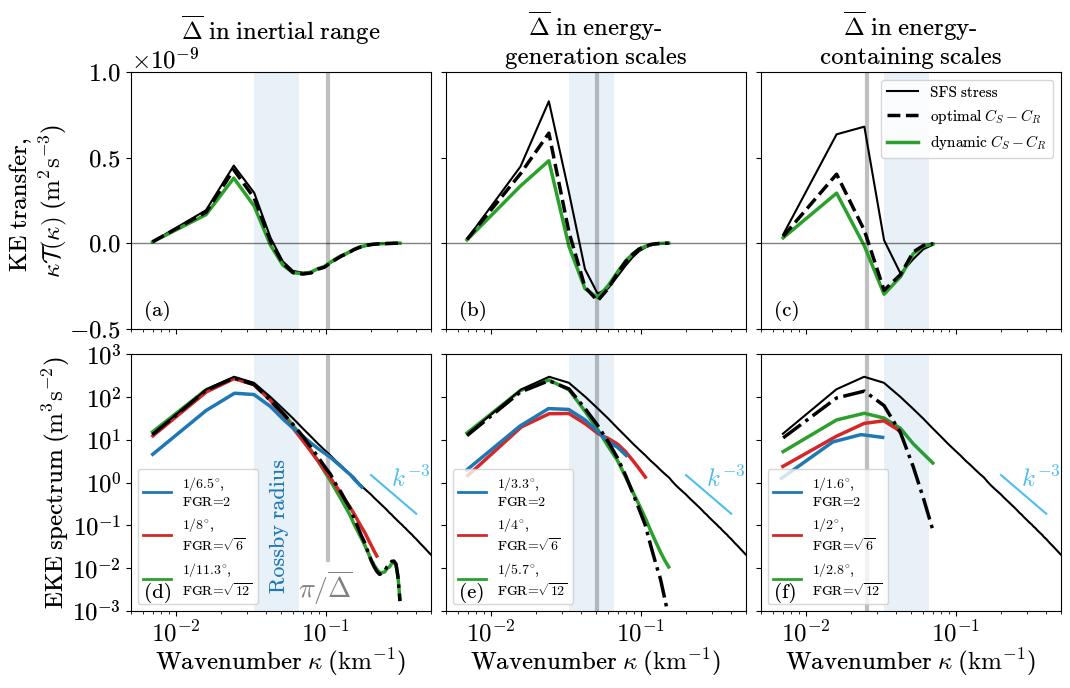

In [61]:
lightblue = [0.3010, 0.7450, 0.9330]
default_rcParams({'font.size':18, 'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.1})
zl=0
fig = plt.figure(figsize=(12,7))

for col, RR, mesh_size in zip([1,2,3], ['R8', 'R4', 'R2'], [12.5,25,50]):
    plt.subplot(2,3,col)
    #compensated(SGS_transfer[f'CA-{RR}']).isel(zl=zl).plot(color='k', lw=1.5, label='SFS stress')
    compensated(SGS_transfer[f'CA-{RR}-sqrt12-grid']).isel(zl=zl).plot(color='k',lw=1.5, label='SFS stress')
    #compensated(SGS_transfer[f'DMM-R-opt-{RR}']).isel(zl=zl).plot(lw=2.5, ls = '--', color='k', label='optimal $C_S-C_R$',zorder=3)
    compensated(SGS_transfer[f'DMM-R-opt-{RR}-sqrt12-grid']).isel(zl=zl).plot(lw=2.5, ls = '--', color='k', label='optimal $C_S-C_R$',zorder=3)
    #compensated(SGS_transfer[f'DMM-R-opt-seq-{RR}-sqrt12-grid']).isel(zl=zl).plot(lw=1.5, ls = '--', color='k', label='optimal $C_S-C_R$',zorder=3)
    #compensated(SGS_transfer[f'DMM-R-{RR}']).isel(zl=zl).plot(lw=2.5, ls = '-', color='tab:blue', label='dynamic $C_S-C_R$')
    compensated(SGS_transfer[f'DMM-R-{RR}-sqrt12-grid']).isel(zl=zl).plot(lw=2.5, ls = '-', color='tab:green', label='dynamic $C_S-C_R$')
    #compensated(SGS_transfer[f'DMM-R-two-parameter-{RR}-sqrt12-grid']).isel(zl=zl).plot(lw=1.5, ls = '-', color='tab:green', label='dynamic (nonseq.) $C_S-C_R$')

    Rd1 = 30000
    Rd2 = 15000
    plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
    
    plt.xscale('log')
    plt.axhline(y=0,color='k', alpha=0.5, lw=1, ls='-')
    plt.xticks([1e-5,1e-4,1e-3],[None]*3)
    plt.xlabel('')
    if col==1:
        plt.ylabel('KE transfer, \n$\kappa \mathcal{T}(\kappa)$ ($\mathrm{m}^2\mathrm{s}^{-3}$)')
        plt.yticks([-5e-10,0,5e-10,1e-9])
        #plt.text(3e-5,-0.44e-9,'Rossby\nradius', fontsize=16, color='tab:blue')
    else:
        plt.ylabel('')
        plt.yticks([-5e-10,0,5e-10,1e-9], [None]*4)
    plt.title('')
    plt.xlim([5e-6, 5e-4])

    filter_scale=np.pi / (mesh_size * np.sqrt(6)) * 1e-3
    plt.axvline(x=filter_scale, color='gray', alpha=0.5, lw=3,zorder=-2)

plt.legend(fontsize=11)

for col, RR, mesh_size in zip([1,2,3], ['R8', 'R4', 'R2'], [12.5,25,50]):
    plt.subplot(2,3,col+3)
    ds[f'boundary10-{RR}-FGR-2'].EKE_spectrum.isel(zl=0).plot(lw=2.5, color='tab:blue',zorder=5)
    ds[f'boundary10-{RR}'].EKE_spectrum.isel(zl=0).plot(lw=2.5, color='tab:red',zorder=2)
    ds[f'boundary10-{RR}-FGR-sqrt12'].EKE_spectrum.isel(zl=0).plot(lw=2.5, color='tab:green',zorder=1)
    ds[f'R64_{RR}_FGR-sqrt12-grid'].EKE_spectrum.isel(zl=0).plot(ls='-.', lw=2.5, color='k',zorder=6)
    #ds[f'R64_{RR}_FGR-sqrt6'].EKE_spectrum.isel(zl=0).plot(ls=':', lw=2.5, color=lightblue)
    ds['R64'].EKE_spectrum.isel(zl=0).plot(color='k', lw=1.5, zorder=4)

    k = [2e-4, 4e-4]
    E = [1.5e+0, 0]
    plt.text(2.7e-4,0.08e+1,'$k^{-3}$',color=lightblue)
    E[1] = E[0] * (k[1]/k[0])**(-3)
    plt.loglog(k,E,ls='-', color=lightblue)

    Rd1 = 30000
    Rd2 = 15000
    plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
    
    plt.xscale('log'); plt.yscale('log')
    plt.xlabel(r'Wavenumber $\kappa$ ($\mathrm{km}^{-1}$)')
    if col==1:
        plt.ylabel('EKE spectrum ($\mathrm{m}^3\mathrm{s}^{-2}$)')
        plt.yticks([1e-3, 1e-2, 1e-1, 1e0,1e1,1e2,1e3])
    else:
        plt.ylabel('')
        plt.yticks([1e-3, 1e-2, 1e-1, 1e0,1e1,1e2,1e3], [None]*7)
    plt.title('')
    plt.ylim([1e-3,1e+3])
    plt.xticks([1e-5,1e-4,1e-3],['$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
    plt.xlim([5e-6, 5e-4])

    filter_scale=np.pi / (mesh_size * np.sqrt(6)) * 1e-3
    if col==1:
        plt.axvline(x=filter_scale, color='gray', alpha=0.5, lw=3,zorder=-2, ymin=0.2)
        plt.text(0.65e-4,0.2e-2,'$\pi/\overline{\Delta}$',color='gray',zorder=10, fontsize=20)
    else:
        plt.axvline(x=filter_scale, color='gray', alpha=0.5, lw=3,zorder=-2)

plt.subplot(2,3,3)
plt.title('$\overline{\Delta}$ in energy-\ncontaining scales', fontsize=18)
plt.subplot(2,3,2)
plt.title('$\overline{\Delta}$ in energy-\ngeneration scales', fontsize=18)
plt.subplot(2,3,1)
plt.title('$\overline{\Delta}$ in inertial range', fontsize=18)

#plt.gcf().align_titles()

plt.subplot(2,3,6)
plt.plot(np.nan,np.nan,lw=2,color='tab:blue', label='$1/1.6^{\circ}$, \nFGR=$2$')
plt.plot(np.nan,np.nan,lw=2,color='tab:red', label='$1/2^{\circ}$, \nFGR=$\sqrt{6}$')
plt.plot(np.nan,np.nan,lw=2,color='tab:green', label='$1/2.8^{\circ}$, \nFGR=$\sqrt{12}$')
plt.legend(fontsize=10,loc='lower left')

plt.subplot(2,3,5)
plt.plot(np.nan,np.nan,lw=2,color='tab:blue', label='$1/3.3^{\circ}$, \nFGR=$2$')
plt.plot(np.nan,np.nan,lw=2,color='tab:red', label='$1/4^{\circ}$, \nFGR=$\sqrt{6}$')
plt.plot(np.nan,np.nan,lw=2,color='tab:green', label='$1/5.7^{\circ}$, \nFGR=$\sqrt{12}$')
plt.legend(fontsize=10,loc='lower left')

plt.subplot(2,3,4)
plt.plot(np.nan,np.nan,lw=2,color='tab:blue', label='$1/6.5^{\circ}$, \nFGR=$2$')
plt.plot(np.nan,np.nan,lw=2,color='tab:red', label='$1/8^{\circ}$, \nFGR=$\sqrt{6}$')
plt.plot(np.nan,np.nan,lw=2,color='tab:green', label='$1/11.3^{\circ}$, \nFGR=$\sqrt{12}$')
plt.legend(fontsize=10,loc='lower left')

plt.subplot(2,3,4)
plt.text(4.2e-5,1e-1,'Rossby radius', fontsize=16, color='tab:blue', rotation='vertical', verticalalignment='center')

plt.plot(np.nan,np.nan,lw=2,color='k', label='$1/64^\circ$')

set_letters(x=0.045, y=0.05, fontsize=15, fontweight='normal')
plt.savefig('figure-proceedings/FGR-sensitivity.pdf')

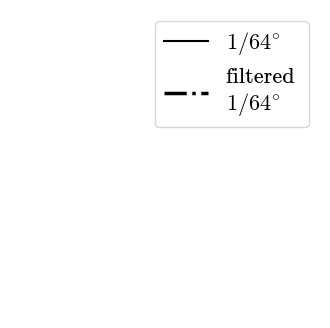

In [114]:
plt.figure(figsize=(4,4))
plt.plot(np.nan,np.nan,lw=1.5,color='k', label='$1/64^{\circ}$')
plt.plot(np.nan,np.nan,lw=2.5,ls='-.',color='k', label='filtered \n$1/64^{\circ}$')
plt.legend()
plt.axis('off')
plt.savefig('figure-proceedings/legend.pdf')

# Metrics plot

In [62]:
error = xr.open_dataset('generalization-FGR-sqrt12.nc').load()

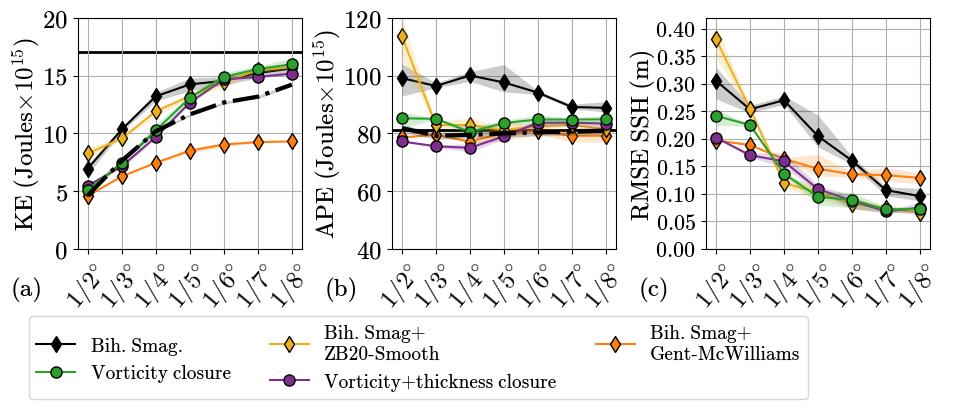

In [72]:
default_rcParams({'font.size': 18, 'figure.subplot.wspace': 0.4, 'figure.subplot.hspace': 0.1})
plt.figure(figsize=(11,3))

yellow = [0.9290, 0.6940, 0.1250]
violet = [0.4940, 0.1840, 0.5560]
lightblue = [0.3010, 0.7450, 0.9330]

for row, fun_str in enumerate(['KE', 'APE', 'ssh']):
    plt.subplot(1,3,row+1)

    def plot_markers_with_filling(model='Jansen-Held', color='tab:red', marker='s', label=None, markersize=None, lw=None, ls=None, alpha=1, zorder=None):
        try:
            ave = []
            if 'sample' in error[model].dims:
                ave.append('sample')
            if 'zl' in error[model].dims:
                ave.append('zl')
    
            error[model].mean(ave).plot(color=color, marker=marker, label=label, markersize=markersize, markeredgecolor='k', lw=lw, ls=ls, alpha=alpha, zorder=zorder)
            plt.fill_between(range(7), error[model].min(ave), error[model].max(ave), color=color, alpha=0.2, lw=0, zorder=zorder)
        except:
            pass
    
    
    plot_markers_with_filling(f'bare-{fun_str}', 'k', 'd', 'Bih. Smag.', 8, zorder=2)
    plot_markers_with_filling(f'DbMM-R-{fun_str}', 'tab:green', 'o', 'Vorticity closure', 8, alpha=1,zorder=5)
    plot_markers_with_filling(f'ZB-Smooth-{fun_str}', yellow, 'd', 'Bih. Smag+\nZB20-Smooth', 8, alpha=1,zorder=3)
    plot_markers_with_filling(f'DbMMh-R-{fun_str}', violet, 'o', 'Vorticity+thickness closure', 8, alpha=1,zorder=4)
    plot_markers_with_filling(f'GM-125-{fun_str}', 'tab:orange', 'd', 'Bih. Smag+\nGent-McWilliams', 8, alpha=1, zorder=2)
    
    if fun_str in ['KE', 'APE']:
       plot_markers_with_filling(f'R64-FGR-sqrt12-{fun_str}', 'k', '', 'filtered \n$1/64^{\circ}$', ls='-.', lw=3,zorder=6)
    
    plt.xticks([0,1,2,3,4,5,6], ['$1/2^{\circ}$', '$1/3^{\circ}$', '$1/4^{\circ}$', '$1/5^{\circ}$', '$1/6^{\circ}$', '$1/7^{\circ}$', '$1/8^{\circ}$'],rotation=50)    
    plt.grid()
    plt.xlabel('')
    if fun_str == 'KE':
        yticks = np.arange(0,40,5)
        plt.ylabel('KE (Joules$\\times10^{15}$)')
        plt.yticks(yticks)
        plt.ylim([0,20])
        plt.axhline(y=17.04075970194989,color='k', zorder=-1,lw=2)
        #plt.title('Kinetic energy (KE)', fontsize=16)
        #plt.text(0.0, 17.5,'$1/64^{\circ}$', color='gray')
    if fun_str == 'EKE':
        yticks = np.arange(0,40,5)
        plt.ylabel('EKE, Joules$\\times10^{15}$')
        plt.axhline(y=10.91081797,color='gray', zorder=-1,lw=3)
        plt.yticks(yticks)
        plt.ylim([0,20])
    if fun_str == 'MKE':
        yticks = np.arange(0,40,5)
        plt.ylabel('MKE, Joules$\\times10^{15}$')
        plt.axhline(y=6.12994173,color='gray', zorder=-1,lw=3)
        plt.yticks(yticks)
        plt.ylim([0,20])
    if fun_str == 'APE':
        yticks = np.arange(40,130,20)
        plt.ylabel('APE (Joules$\\times10^{15}$)')
        #plt.title('Available \n potential energy (APE)', fontsize=16)
        plt.yticks(yticks)
        plt.ylim([min(yticks), max(yticks)])
        plt.axhline(y=81.31324435644875,color='k',zorder=-1,lw=2)
    
    if fun_str == 'ssh':
        yticks = np.arange(0,0.45,0.05)
        plt.ylabel('RMSE SSH (m)')
        #plt.title('RMSE in time-averaged \nsea surface height (SSH)', fontsize=16)
        plt.yticks(yticks, fontsize=16)
        plt.ylim([0,0.42])

    if fun_str == 'Cs':
        plt.ylim([0,0.1])
        plt.ylabel('$C_S$')

plt.gcf().align_ylabels()
#set_letters(fontsize=18,x=0.0,y=1.05)
#plt.plot(np.nan,np.nan,'-',color='k',lw=2,label='$1/64^{\circ}$')
#plt.plot(np.nan,np.nan,'-.',color='k',lw=3,label='filtered\n$1/64^{\circ}$')
#plt.plot(np.nan,np.nan,'--',color='k',lw=3,label='filtered $1/64^{\circ}$')
plt.legend(ncol=3, bbox_to_anchor=(0.5,-0.25), fontsize=14)

set_letters(fontsize=18, x=-0.3,y=-0.2, fontweight='normal')
#plt.tight_layout()
plt.savefig('figure-proceedings/metrics-GM.pdf')

# Check SSM for thickness

In [8]:
ds.exps

['R6-en-diss',
 'R8-en-diss',
 'R8',
 'R3',
 'R4-en-diss',
 'R64',
 'R7',
 'R2',
 'R5',
 'R32',
 'R3-en-diss',
 'R5-en-diss',
 'R2-en-diss',
 'R16',
 'R6',
 'R7-en-diss',
 'R4',
 'boundary10-R8-FGR-sqrt12',
 'boundary10-R8',
 'boundary10-R4-FGR-2',
 'boundary10-R2',
 'boundary10-R8-FGR-2',
 'boundary10-R2-FGR-sqrt12',
 'boundary10-R4-FGR-sqrt12',
 'boundary10-R4',
 'boundary10-R2-FGR-2',
 'ZB-ssd-R2-ZB-0.5',
 'ZB-ssd-R2-ZB-0.4',
 'ZB-ssd-R2-ZB-0.7',
 'ZB-ssd-R2-ZB-0.3',
 'ZB-ssd-R2-ZB-0.6',
 'Jansen-Held-R4-backscatter-data-ref',
 'ZB-Reynolds-R5-ZB-1.2',
 'ZB-Reynolds-R5-ZB-2.2',
 'ZB-Reynolds-R5-ZB-1.8',
 'ZB-Reynolds-R5-ZB-2.6',
 'ZB-Reynolds-R5-ZB-1.5',
 'ZB-Reynolds-R5-ZB-2.4',
 'ZB-Reynolds-R5-ZB-2.5',
 'ZB-Reynolds-R5-ZB-1.6',
 'ZB-Reynolds-R5-ZB-2.8',
 'ZB-Reynolds-R5-ZB-0.8',
 'ZB-Reynolds-R5-ZB-2.0',
 'ZB-Reynolds-R6-ZB-1.2',
 'ZB-Reynolds-R6-ZB-2.2',
 'ZB-Reynolds-R6-ZB-1.8',
 'ZB-Reynolds-R6-ZB-2.6',
 'ZB-Reynolds-R6-ZB-1.5',
 'ZB-Reynolds-R6-ZB-2.4',
 'ZB-Reynolds-R6-ZB-2.

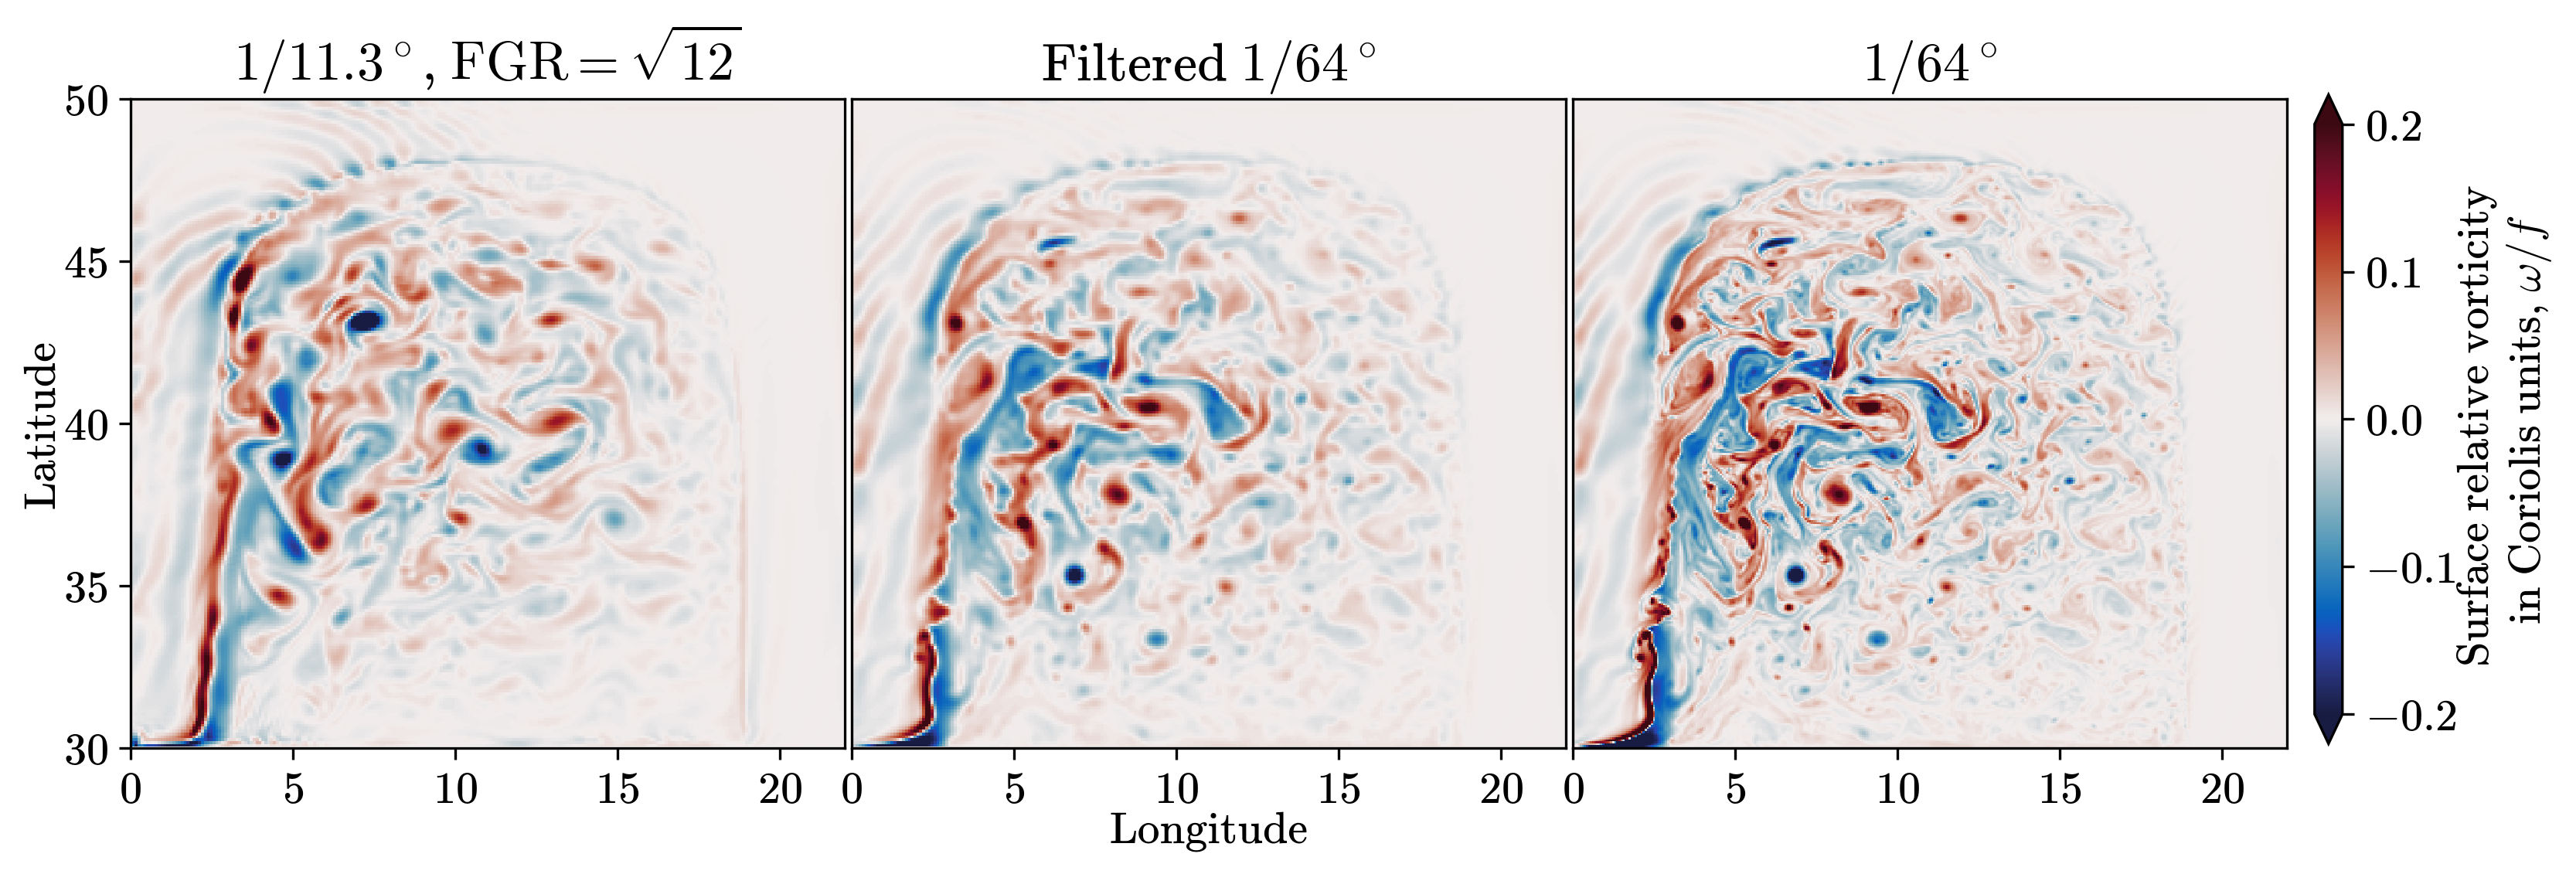

In [31]:
def plot_vorticity(exp):
    field = ds[exp].RV_f.isel(zl=0,Time=-1)
    if exp=='R64':
        field = field.coarsen(xq=2,yq=2,boundary='trim').mean().compute()
    im = field.plot.pcolormesh(vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance, add_colorbar=False, rasterized=True)# interpolation='none')
    plt.xticks([0,5,10,15,20])
    plt.yticks([30,35,40,45,50])
    plt.xlim([0,22])
    plt.ylim([30,50])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('')
    plt.gca().set_aspect(1)
    return im

#ds.plot_RV(['boundary10-R4-FGR-sqrt12', 'R64_R4_FGR-sqrt12-grid', 'R64'])
    
default_rcParams({'figure.subplot.wspace': 0.01})
plt.figure(figsize=(12,4), dpi=300)
plt.subplot(1,3,1)
plot_vorticity('boundary10-R8-FGR-sqrt12')
plt.xlabel('')
plt.title('$1/11.3^\circ$, $\mathrm{FGR}=\sqrt{12}$')
#plt.title('$1/5.7^\circ$, $\mathrm{FGR}=\sqrt{12}$')
plt.subplot(1,3,2)
plot_vorticity('R64_R8_FGR-sqrt12-grid')
plt.ylabel('')
plt.yticks([])
plt.title('Filtered $1/64^\circ$')
plt.subplot(1,3,3)
im=plot_vorticity('R64_R16')
plt.title('$1/64^\circ$')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])

cax = plt.gcf().add_axes([0.91, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cax, extend='both', label='Surface relative vorticity \nin Coriolis units, $\omega/f$')
plt.savefig('figure-proceedings/LES-R8-pcolormesh.pdf', dpi=150)

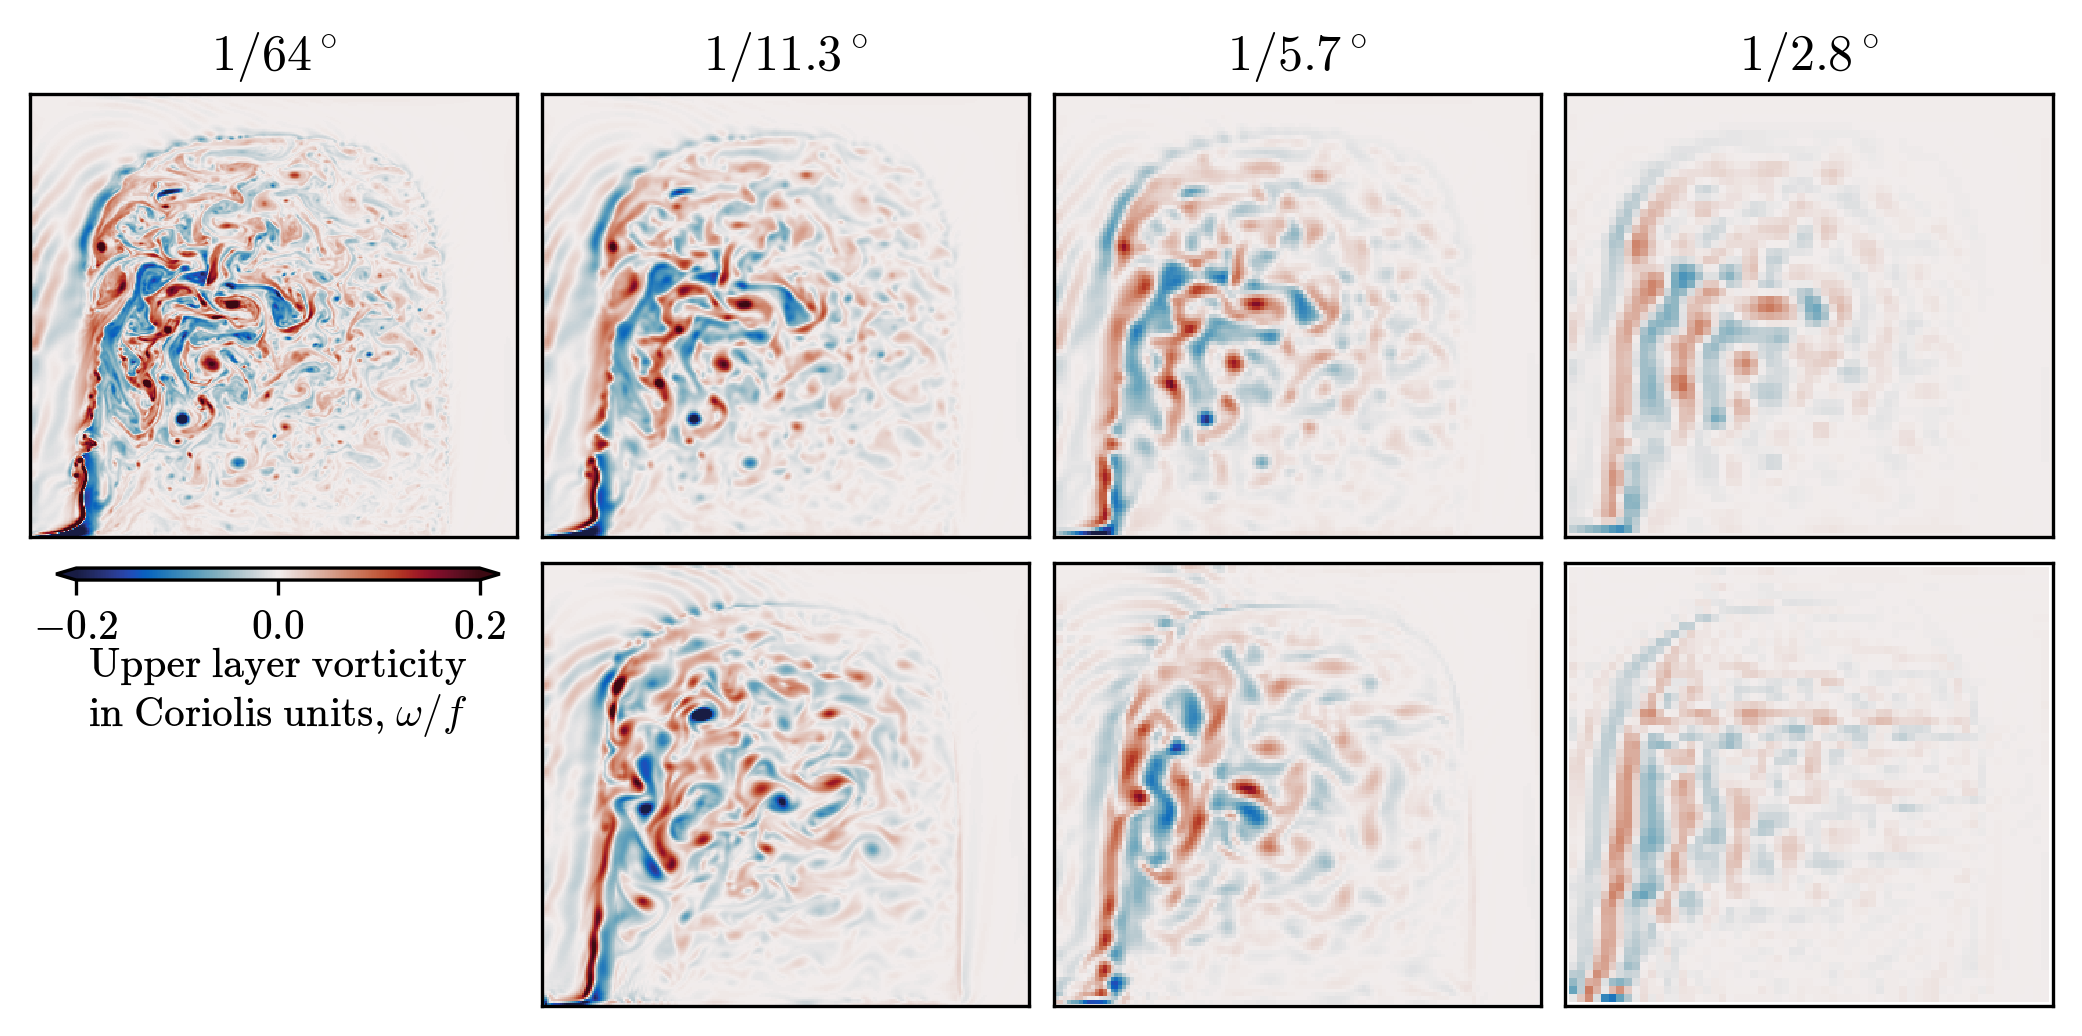

In [46]:
def plot_vorticity(exp,x=False,y=False):
    field = ds[exp].RV_f.isel(zl=0,Time=-1)
    if exp=='R64':
        field = field.coarsen(xq=2,yq=2,boundary='trim').mean().compute()
    im = field.plot.pcolormesh(vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance, add_colorbar=False, rasterized=True)#, interpolation='none')
    if x:
        plt.xticks([0,5,10,15,20])
        plt.xlabel('Longitude')
    else:
        plt.xticks([])
        plt.xlabel('')
    if y:
        plt.yticks([30,35,40,45,50])
        plt.ylabel('Latitude')
    else:
        plt.yticks([])
        plt.ylabel('')
        
    plt.xlim([0,22])
    plt.ylim([30,50])

    plt.title('')
    plt.gca().set_aspect(1)
    return im


default_rcParams({'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.03, 'font.size': 10})
plt.figure(figsize=(8.7,4), dpi=300)
plt.subplot(2,4,1)
im=plot_vorticity('R64_R16')
plt.title('$1/64^\circ$', fontsize=12)

plt.subplot(2,4,2)
im=plot_vorticity('R64_R8_FGR-sqrt12-grid')
#plt.title('$\overline{\Delta}$ in inertial range', fontsize=10)
plt.title('$1/11.3^\circ$', fontsize=12)

plt.subplot(2,4,3)
im=plot_vorticity('R64_R4_FGR-sqrt12-grid')
plt.title('Filtered $1/64^\circ$')
#plt.title('$\overline{\Delta}$ in energy-\ngeneration scales', fontsize=10)
plt.title('$1/5.7^\circ$', fontsize=12)

plt.subplot(2,4,4)
im=plot_vorticity('R64_R2_FGR-sqrt12-grid')
plt.title('Filtered $1/64^\circ$')
#plt.title('$\overline{\Delta}$ in energy-\ncontaining scales', fontsize=10)
plt.title('$1/2.8^\circ$', fontsize=12)

plt.subplot(2,4,6)
im=plot_vorticity('boundary10-R8-FGR-sqrt12')

plt.subplot(2,4,7)
im=plot_vorticity('boundary10-R4-FGR-sqrt12')

plt.subplot(2,4,8)
im=plot_vorticity('boundary10-R2-FGR-sqrt12')

cax = plt.gcf().add_axes([0.135, 0.47, 0.17, 0.01])
cbar = plt.colorbar(im, cax=cax, extend='both', label='Upper layer vorticity\nin Coriolis units, $\omega/f$', orientation='horizontal')
plt.savefig('figure-proceedings/LES-grid-update.pdf', dpi=200)


In [11]:
ds.remesh('R64', 'boundary10-R8-FGR-sqrt12', exp=f'R64_resample')

Experiment R64 coarsegrained to boundary10-R8-FGR-sqrt12 is created. Its identificator=R64_resample


# Just a snapshot

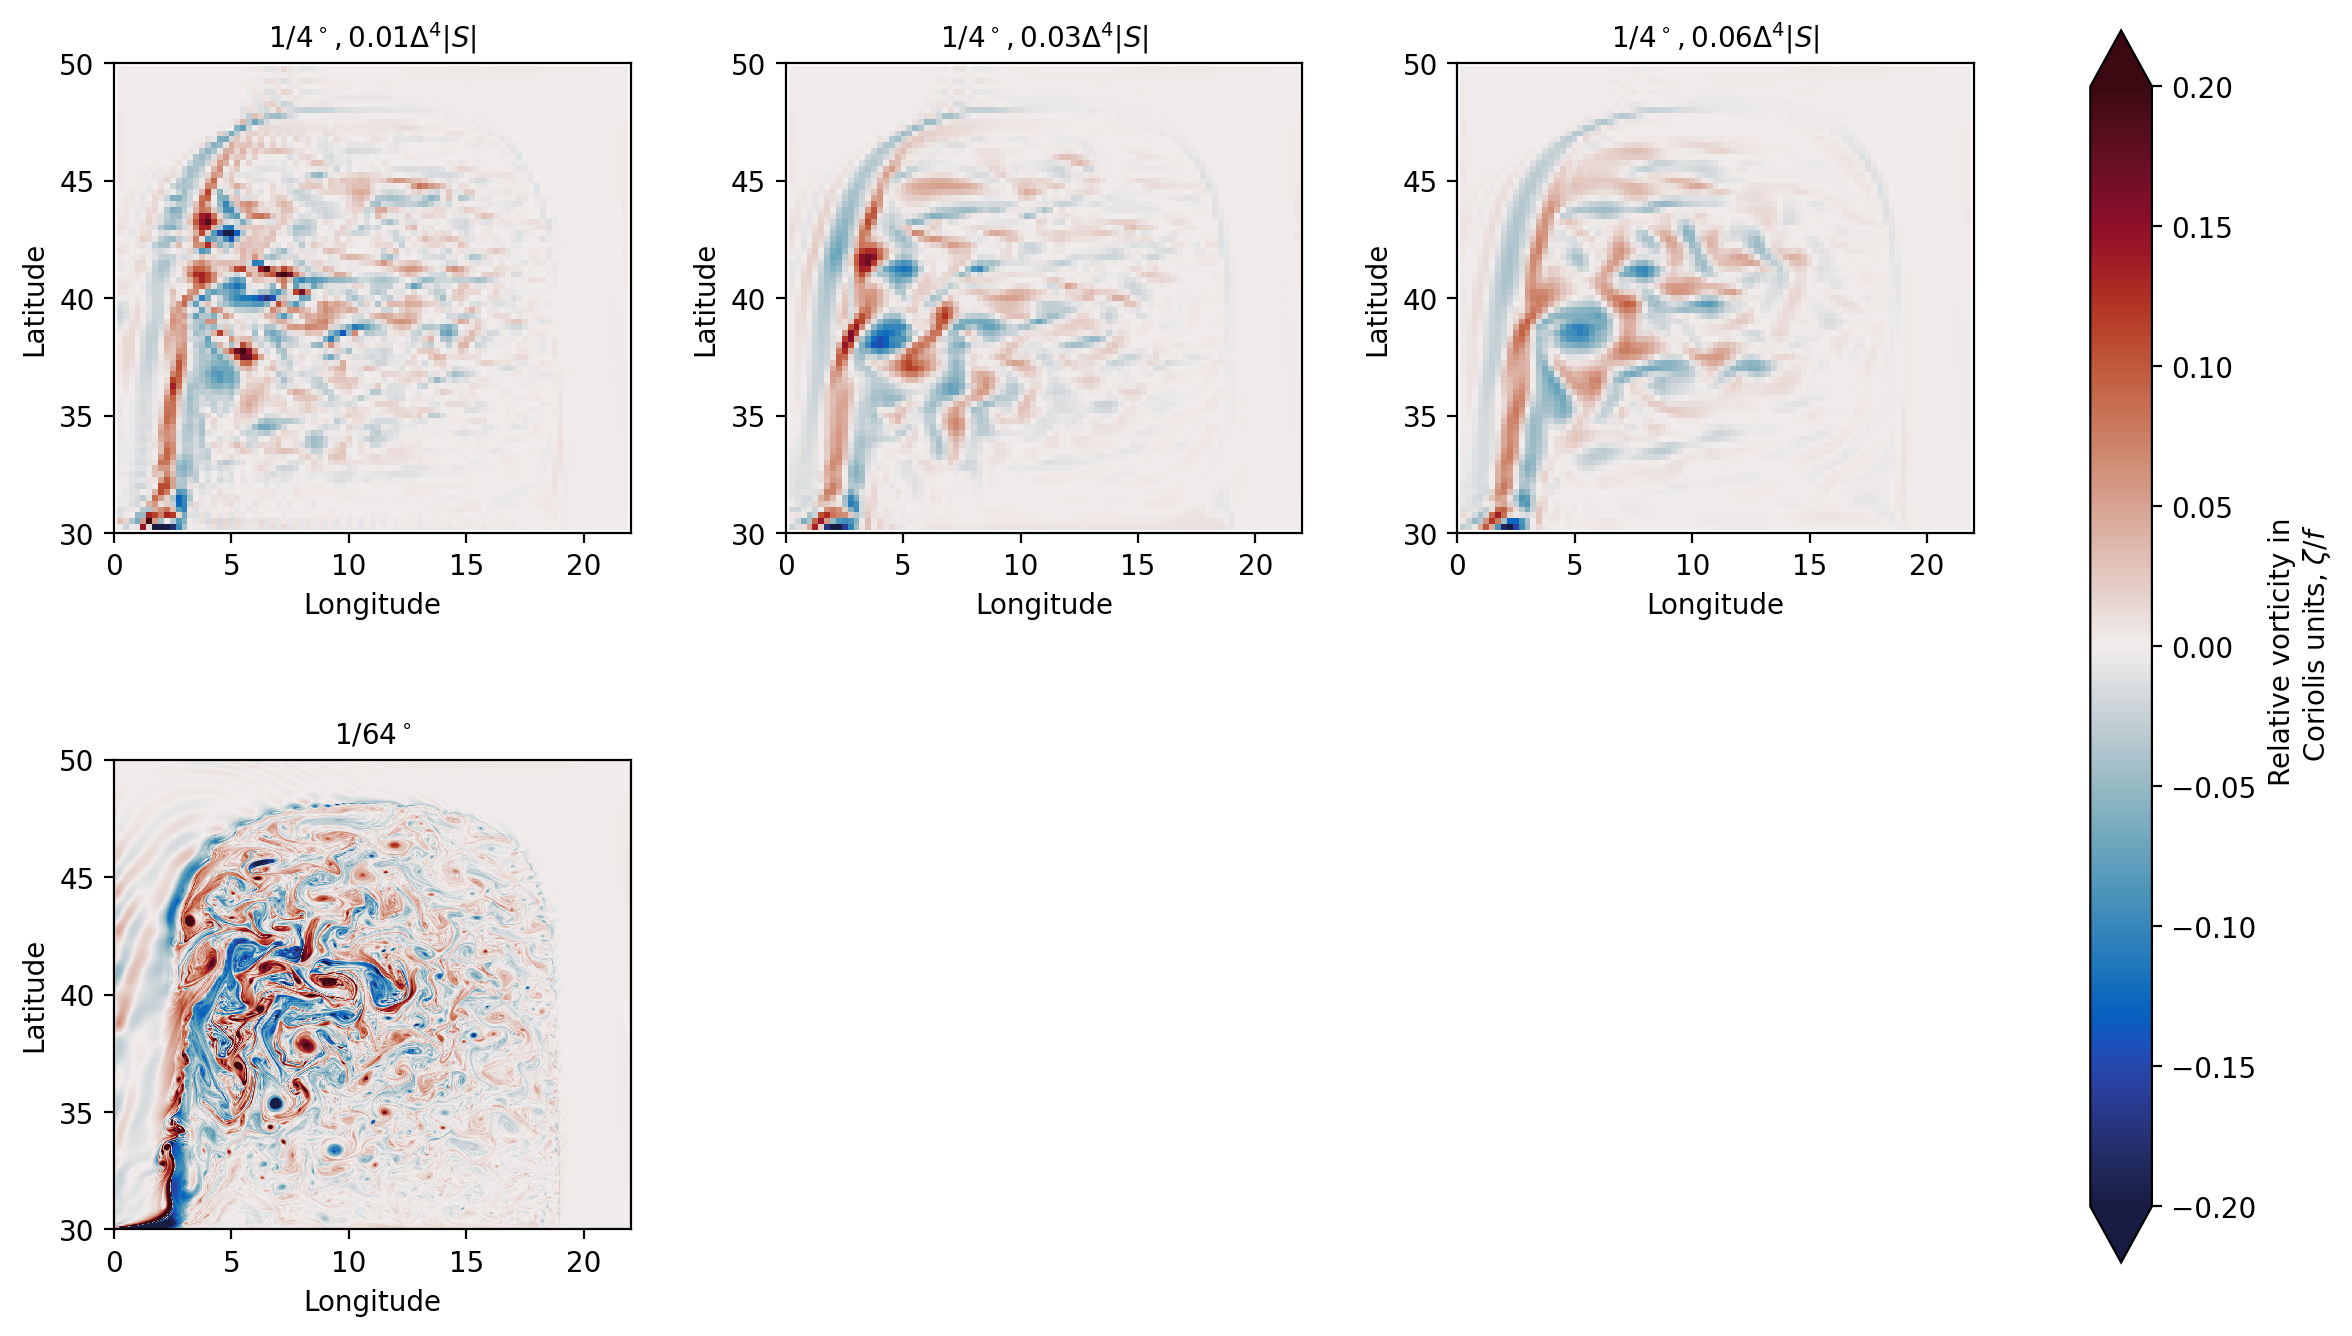

In [16]:
ds.plot_RV(['R4-0.01', 'R4-0.03', 'R4', 'R64'],['$1/4^\circ, 0.01\Delta^4 |S|$', '$1/4^\circ, 0.03\Delta^4 |S|$', '$1/4^\circ, 0.06\Delta^4 |S|$', '$1/64^\circ$'])
plt.savefig('fig.png', dpi=300)